#DISTRIBUCION POISSON Y EXPONENCIAL
En una tienda departamental de electrónicos, los gerentes desean simular el comportamiento de los clientes y el servicio para optimizar el personal y los tiempos de espera. Para esto, se pueden modelar dos situaciones claves:

Llegadas de clientes: Los clientes llegan a la tienda de manera aleatoria. Se sabe que en promedio llegan 10 clientes por hora. Tiempo de servicio: Cada cliente que llega recibe atención personalizada para comprar productos electrónicos. El tiempo promedio de servicio es de 15 minutos por cliente. El objetivo es combinar ambos modelos para obtener una simulación que muestre cómo interactúan las llegadas y los tiempos de servicio, lo que permitirá mejorar la gestión de personal en la tienda.

Facilitador: José Gabriel Rodríguez Rivas

Alumno: Carlos Simental Arrieta


Llegadas simuladas por hora:
[10, 6, 9, 10, 14, 9, 12, 7, 7, 11, 9, 10, 10, 9, 9, 10, 6, 12, 8, 6, 10, 8, 8, 12, 9, 9, 5, 5, 13, 8, 19, 8, 10, 7, 17, 11, 7, 13, 8, 10, 10, 4, 7, 13, 9, 8, 8, 14, 8, 12, 9, 11, 13, 11, 14, 15, 12, 9, 9, 10, 9, 9, 11, 13, 16, 6, 9, 5, 2, 8, 7, 9, 8, 7, 18, 8, 11, 10, 4, 9, 12, 9, 5, 2, 7, 9, 12, 9, 6, 13, 10, 11, 9, 12, 9, 8, 8, 8, 12, 4, 12, 8, 8, 16, 12, 14, 16, 19, 8, 7, 7, 8, 10, 8, 14, 10, 11, 10, 11, 10, 14, 15, 10, 8, 12, 10, 17, 11, 19, 11, 7, 7, 9, 11, 10, 7, 11, 11, 10, 12, 12, 5, 10, 13, 14, 11, 12, 12, 5, 16, 5, 14, 16, 12, 8, 13, 13, 13, 12, 8, 9, 8, 8, 5, 8, 11, 13, 13, 11, 11, 11, 11, 11, 9, 9, 8, 2, 15, 6, 6, 10, 19, 16, 6, 6, 5, 10, 9, 13, 9, 13, 10, 8, 7, 10, 9, 8, 7, 12, 13, 7, 8, 9, 12, 10, 18, 7, 11, 9, 7, 7, 5, 14, 18, 5, 10, 11, 10, 11, 5, 8, 9, 23, 12, 7, 9, 8, 11, 12, 7, 7, 12, 12, 15, 7, 6, 6, 12, 9, 10, 9, 5, 14, 4, 15, 7, 14, 8, 14, 5, 8, 13, 10, 16, 13, 14, 9, 6, 11, 10, 10, 2, 9, 16, 13, 9, 9, 7, 10, 6, 15, 14, 12, 6, 13, 15,

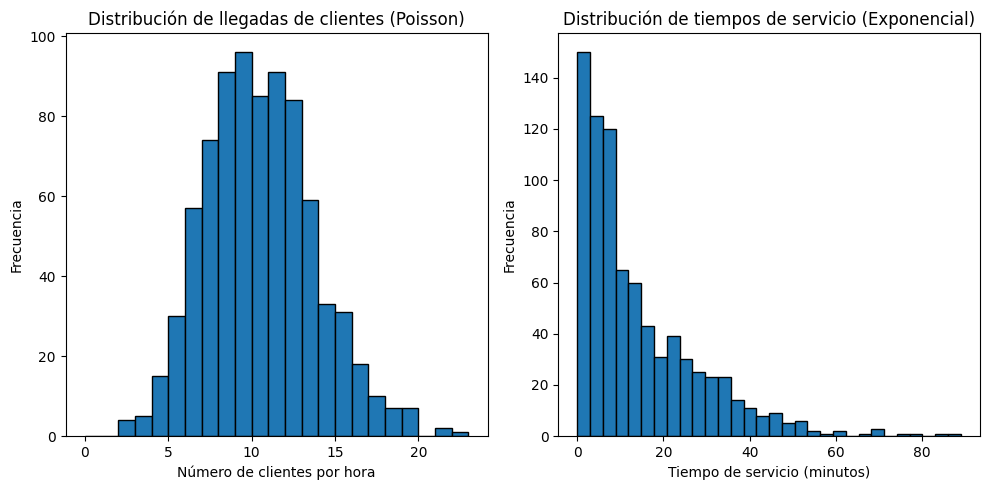

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parámetros del modelo
lambda_llegadas = 10  # Llegadas promedio de clientes por hora (Poisson)
tiempo_servicio_promedio = 15  # Tiempo promedio de servicio en minutos (Exponencial)
lambda_servicio = 1 / tiempo_servicio_promedio  # Tasa para la distribución exponencial

# Generar llegadas de clientes usando la distribución Poisson (transformada inversa)
def poisson_inverse_transform(lambda_poisson, U):
    F_k = 0  # Inicializamos la FDA
    k = 0
    while True:
        F_k += (lambda_poisson ** k) * math.exp(-lambda_poisson) / math.factorial(k)
        if U <= F_k:
            return k
        k += 1

# Generar tiempos de servicio usando la distribución Exponencial (transformada inversa)
def exponencial_inverse_transform(lambda_servicio, U):
    return -math.log(1 - U) / lambda_servicio

# Simulación de 8 horas en la tienda departamental
num_horas = 8
num_simulaciones = 100  # Número de simulaciones
llegadas_simuladas = []
servicios_simulados = []

# Simulamos para cada hora
for _ in range(num_horas):
    # Generamos un número de clientes por hora (Poisson)
    U_llegadas = np.random.uniform(0, 1, num_simulaciones)
    llegadas_hora = [poisson_inverse_transform(lambda_llegadas, u) for u in U_llegadas]
    llegadas_simuladas.extend(llegadas_hora)

    # Generamos los tiempos de servicio para cada cliente (Exponencial)
    U_servicio = np.random.uniform(0, 1, len(llegadas_hora))
    tiempos_servicio = [exponencial_inverse_transform(lambda_servicio, u) for u in U_servicio]
    servicios_simulados.extend(tiempos_servicio)

# Mostrar resultados
print("Llegadas simuladas por hora:")
print(llegadas_simuladas)
print("Tiempos de servicio (en minutos) simulados:")
print(servicios_simulados)

# Graficar los resultados
plt.figure(figsize=(10, 5))

# Graficar llegadas
plt.subplot(1, 2, 1)
plt.hist(llegadas_simuladas, bins=range(0, max(llegadas_simuladas)+1), edgecolor='black')
plt.title("Distribución de llegadas de clientes (Poisson)")
plt.xlabel("Número de clientes por hora")
plt.ylabel("Frecuencia")

# Graficar tiempos de servicio
plt.subplot(1, 2, 2)
plt.hist(servicios_simulados, bins=30, edgecolor='black')
plt.title("Distribución de tiempos de servicio (Exponencial)")
plt.xlabel("Tiempo de servicio (minutos)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()
